# **Que2.**

# 1.

Outliers:
Outliers are data points that deviate significantly from the overall pattern or trend of the data. The negative effects of outliers on the regression equation include:

High Leverage Points:
High leverage points are data points that have a significant impact on the estimation of the regression model parameters. The negative effects of high leverage points on the regression equation include:

Both Outliers and High Leverage Points:
Data points that are both outliers and high leverage points can have a combined negative effect on the regression equation, leading to an increase in variance and a reduction in the predictive power of the model.

The negetive effects:

1.Increased Variance:
Outliers and high leverage points can increase the variance (scatter) of the model, leading to a wider spread of data points around the regression line.
This increased variance can reduce the precision and accuracy of the model's predictions and make it more challenging to identify the true underlying pattern in the data.

2.Reduced Predictive Power:

3.Biased Parameter Estimations:

# 2.

The "coefficient of determination," denoted as R-squared, is a measure of the strength of the linear relationship between two variables. It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R-squared is used as an indicator to assess how well the regression model fits the data. It ranges from 0 to 1, where 0 indicates that the model does not explain any of the variability of the response data around its mean, and 1 indicates that the model perfectly explains all the variability.

# 3.

Something additional that I gave ChatGPT to produce to better understand an outlier and a leverage point and their differences!

Let's consider an example where we have a dataset of students' exam scores and the number of hours they studied, and we want to build a linear regression model to predict exam scores based on study hours.

Suppose we have the following data:

| Study Hours | Exam Score |
|-------------|------------|
| 2           | 60         |
| 3           | 70         |
| 4           | 80         |
| 5           | 85         |
| 6           | 90         |
| 7           | 95         |
| 8           | 100        |
| 9           | 110        |
| 20          | 150        |

In this dataset, the data point (20, 150) represents a student who studied for an unusually large number of hours compared to the rest of the students. This data point could be considered a leverage point because of its unusual value on the predictor variable (study hours), which has the potential to strongly influence the estimation of the regression coefficients.

At the same time, the data point (20, 150) could also be considered an outlier if its exam score deviates significantly from the scores of other students who studied for a similar number of hours.

The distinction between leverage points and outliers in this example is that the data point (20, 150) is a leverage point due to its unusual value on the predictor variable (study hours), and it may exert a strong influence on the estimation of the regression coefficients. Simultaneously, it is an outlier due to its unusually high exam score compared to other students who studied for a similar number of hours.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Original data(#1)
x_original = np.array([-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5])
y_original = np.array([-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5])

# outlier
x_outlier = np.array([5.8, 20.4])
y_outlier = np.array([31.3, 14.1])

# leverage point
x_leverage = np.array([20.4])
y_leverage = np.array([31.3])

# Data with outlier(#2)
x_data_with_outlier = np.concatenate((x_original, x_outlier), axis=None)
y_data_with_outlier = np.concatenate((y_original, y_outlier), axis=None)

# Data with leverage point(#3)
x_data_with_leverage = np.concatenate((x_original, x_leverage), axis=None)
y_data_with_leverage = np.concatenate((y_original, y_leverage), axis=None)

# Data with both outlier and leverage point(#4)
x_both = np.concatenate((x_original, x_outlier, x_leverage), axis=None)
y_both = np.concatenate((y_original, y_outlier, y_leverage), axis=None)

In [12]:
all_4_cases = [
    (x_original, y_original, "Original Data"),
    (x_data_with_outlier , y_data_with_outlier, "Original Data + Outlier"),
    (x_data_with_leverage , y_data_with_leverage, "Original Data + Leverage point"),
    (x_both, y_both, "Original Data + Outlier + Leverage Point")
]

In [13]:
def linear_regression(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean)**2)

  slope = numerator / denominator
  intercept = y_mean - slope * x_mean

  # R^2
  y_hat = slope * x + intercept
  sst = np.sum((y - y_mean)**2)
  sse = np.sum((y_hat - y)**2)
  r_squared = 1 - sse / sst

  return slope, intercept, r_squared

Original Data


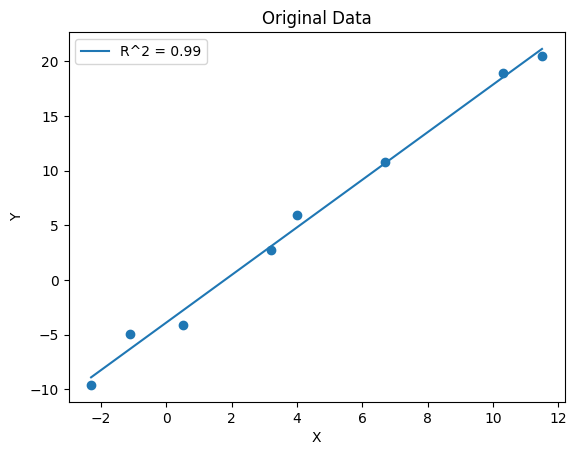




Original Data + Outlier


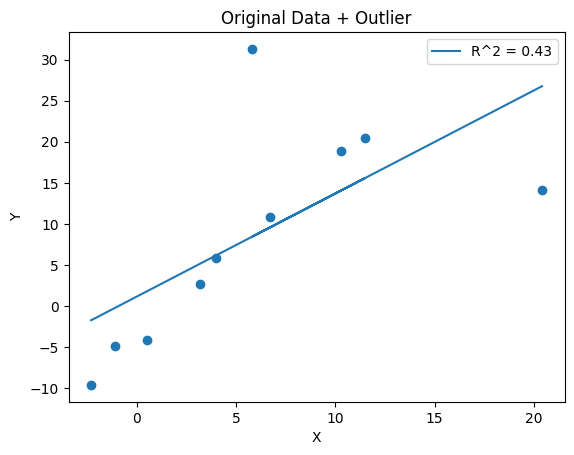




Original Data + Leverage point


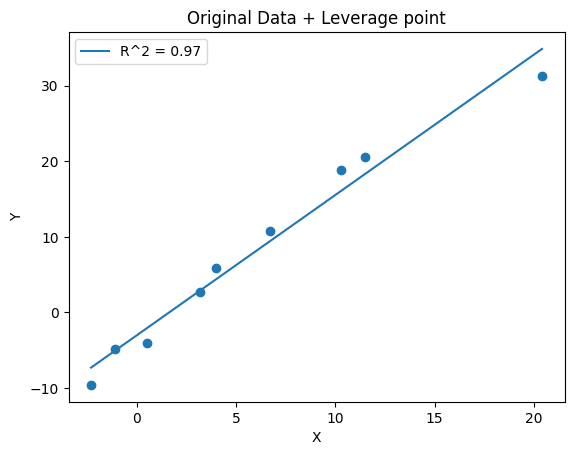




Original Data + Outlier + Leverage Point


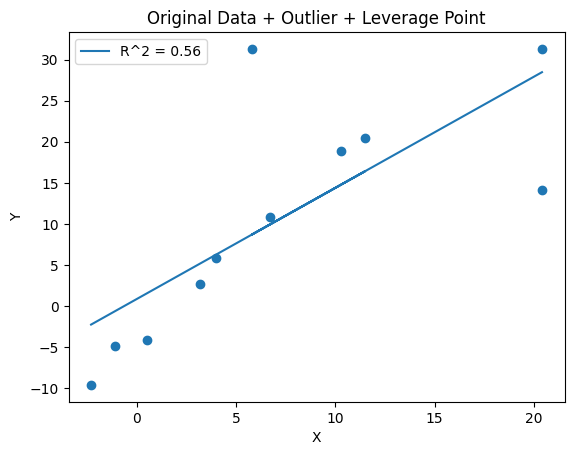

In [14]:
for x, y, title in all_4_cases:
    print(title)
    slope, intercept, r_squared = linear_regression(x, y)

    # Plot the scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, slope * x + intercept, label="R^2 = {:.2f}".format(r_squared))

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    print()
    print()
    print()

# 4.

Robust Regression: Robust regression techniques, such as robust linear regression or robust regression with M-estimators, are designed to be less sensitive to outliers. These methods down-weight the influence of outliers and provide more reliable estimates of the regression coefficients.

Weighted Least Squares: Weighted least squares regression assigns different weights to different data points based on their influence, which can help mitigate the impact of outliers.